In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp

In [16]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin

In [4]:
x = hp.read_map('../calibrations/LFI_SkyMap_030-field-IQU_1024_R2.01_full.fits')

NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING


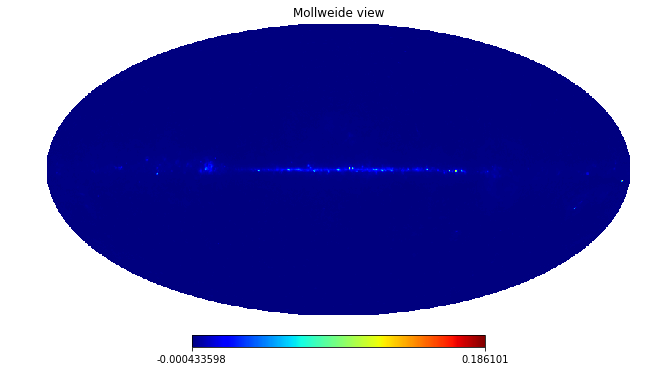

In [5]:
hp.mollview(x)

In [6]:
d2r = np.pi / 180.

In [117]:
lonc = 107.1
latc = 5.2
lonra = [(lonc-4.), (lonc+4.)]
latra = [(latc-4.), (latc+4.)]

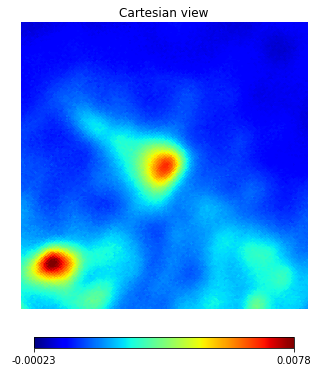

In [118]:
hp.cartview(x, lonra=lonra, latra=latra, min=-0.00023, max=0.0078)

In [119]:
y = hp.smoothing(x, fwhm=1.*d2r)

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [120]:
y = hp.ud_grade(x, 512)

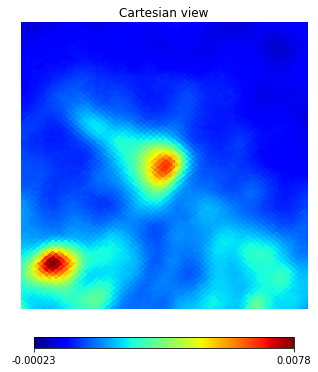

In [121]:
hp.cartview(y, lonra=lonra, latra=latra, min=-0.00023, max=0.0078)

In [122]:
print hp.nside2pixarea(512)
print 9.57e-4 / hp.nside2pixarea(512)

3.99474163512e-06
239.564929954


In [123]:
nu = 28.5e9
X = hplanck * nu / (kboltz * TCMB) 

In [124]:
actualbeam = ( (30./60.) * (np.pi / 180.) )**2

In [125]:
print actualbeam

7.61543549467e-05


In [126]:
print hp.nside2pixarea(512)

3.99474163512e-06


In [127]:
print np.exp(X) * (X / (np.exp(X) - 1.))**2

0.979273876621


In [128]:
Sy = 2. * kboltz * nu**2 / clight**2 * np.exp(X) * (X / (np.exp(X) - 1.))**2 * y * hp.nside2pixarea(512) * 1.e26

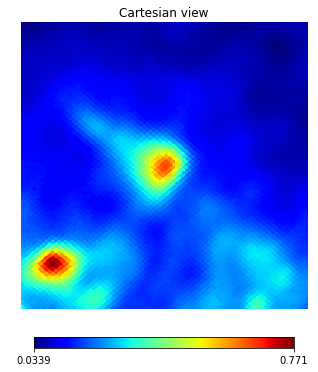

In [129]:
hp.cartview(Sy, lonra=lonra, latra=latra)

In [130]:
indx = np.arange(len(y))

In [131]:
theta, phi = hp.pix2ang(512, indx)

In [132]:
lats = (np.pi / 2. - theta) / d2r 
lons = phi / d2r

In [133]:
radius = np.sqrt( (lats - latc)**2 + (lons - lonc)**2 )
rmask = radius < 1.
amask = (radius > 80./60.) & (radius < 2.)

In [134]:
rpix = hp.ang2pix(512, theta[rmask], phi[rmask])
apix = hp.ang2pix(512, theta[amask], phi[amask])

In [135]:
rdata = Sy[rpix]
adata = Sy[apix]

In [136]:
print np.sum(rdata)

81.4051460935


In [137]:
print np.median(adata)

0.151759445126


In [138]:
print np.sum(rdata - np.median(adata))

45.4381575988


In [139]:
36.6 / 45.4

0.8061674008810573

In [141]:
45.4 / 36.6

1.2404371584699452

In [93]:
rtest = np.zeros(len(Sy))
rtest[rpix] = Sy[rpix]
atest = np.zeros(len(Sy))
atest[apix] = Sy[apix]

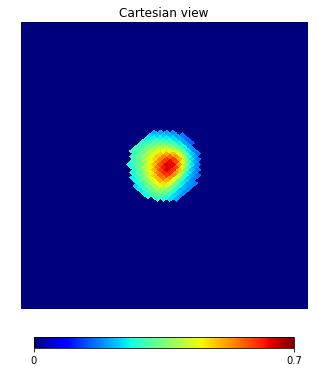

In [94]:
hp.cartview(rtest, lonra=lonra, latra=latra, min=0, max=0.7)

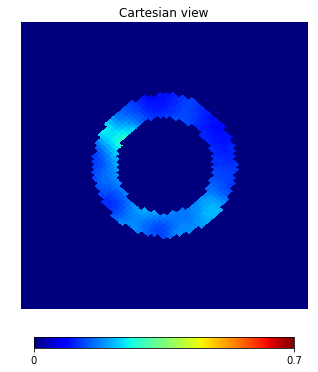

In [95]:
hp.cartview(atest, lonra=lonra, latra=latra, min=0, max=0.7)